In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(ggpmisc)
library(ggpubr)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: ggpp


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom

Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    gen

In [2]:
library(maftools)

# Validated MV variant and cutoff annotation

In [2]:
sort_bulk_amp <- read.table("/projects/ps-gleesonlab8/User/chchung/Interneuron/20221223_7669_Ampliseq_QC/20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
validated_MVs<-unique(subset(sort_bulk_amp, Mosaic_shared_btw_WGS_Amp==1)$CHROM.POS.REF.ALT)

In [3]:
raw<-read.table(file="/projects/ps-gleesonlab8/Uniformly_processed_data/20230727_Changuk_AmpliSeq_7669RF_Interneuron_Bioskryb_DNAtest_IGM/2_Annotation/final_summary_annotated.txt",header=T)

In [4]:
raw$Mosaic_shared_btw_WGS_Amp[raw$CHROM.POS.REF.ALT %in% validated_MVs]<-1
raw$Mosaic_shared_btw_WGS_Amp[!(raw$CHROM.POS.REF.ALT %in% validated_MVs)]<-0

In [5]:
colnames(raw)
unique(raw$Mosaic_shared_btw_WGS_Amp)

[1] "ID"                        "PLATE"                    
 [3] "SAMPLE"                    "CHROM"                    
 [5] "POS"                       "REF"                      
 [7] "ALT"                       "INDIVIDUAL"               
 [9] "CHROM.POS.REF.ALT"         "Mosaic"                   
[11] "ANNO"                      "GENE"                     
[13] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[15] "SEGDUP"                    "HOMOPOLYMER"              
[17] "REF_SEQ"                   "DINUCLEOTIDE"             
[19] "NEAR_INDEL"                "UCSC_RPMSK"               
[21] "DEPTH"                     "REF_COUNT"                
[23] "ALT_COUNT"                 "MAF"                      
[25] "LOWER_CI"                  "UPPER_CI"                 
[27] "CI_IS_GREATER"             "NORMAL_REF_COUNT"         
[29] "NORMAL_ALT_COUNT"          "NORMAL_MAF"               
[31] "NORMAL_LOWER_CI"           "NORMAL_UPPER_CI"          
[33] "NORMAL_CI_IS_GREATER"      "Mosaic_shared_btw_WGS_Amp"

[1] 1 0

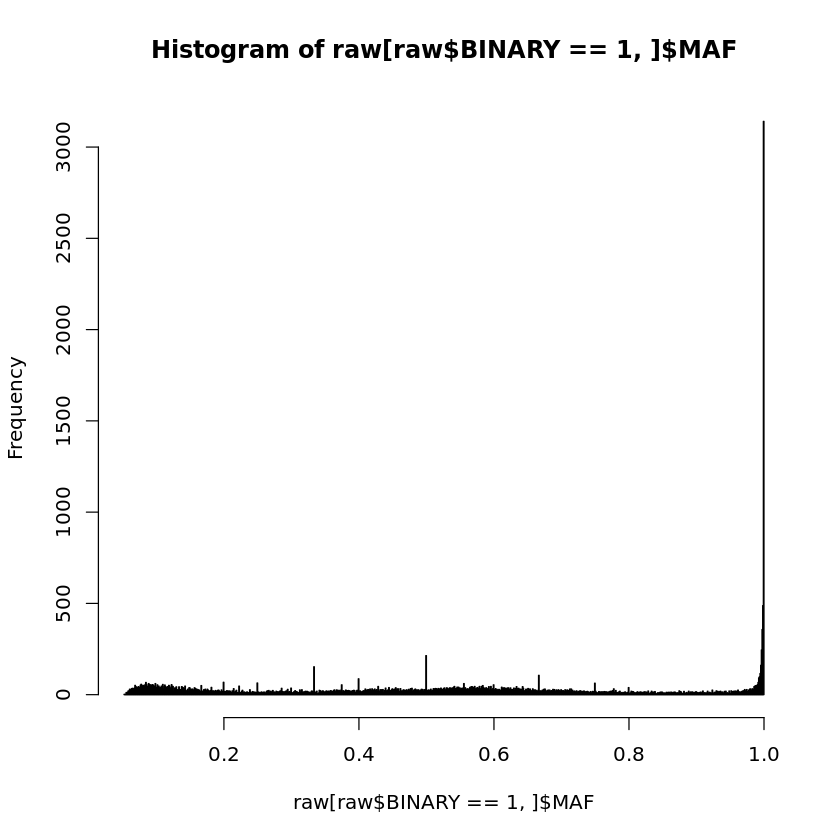

In [6]:
raw$BINARY<-0
raw$BINARY[raw$NORMAL_UPPER_CI<raw$LOWER_CI & raw$LOWER_CI>0.05]<-1
hist(raw[raw$BINARY==1,]$MAF,1000)

In [7]:
raw$BINARY<-as.double(raw$BINARY)

In [8]:
write.table(raw,"./Bioskryb_DNA_final_summary.txt",sep="\t", row.names=FALSE, col.names=TRUE)

# Cell type annotation

In [9]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [9]:
RNA<-read.table(file="../Bioskryb_RNA_cell_type_info_with_ref.txt",header=T)

In [10]:
colnames(raw)
unique(raw$PLATE)
unique(raw$SAMPLE)

colnames(RNA)
unique(RNA$Cell_ID)
unique(RNA$Region)

[1] "ID"                        "PLATE"                    
 [3] "SAMPLE"                    "CHROM"                    
 [5] "POS"                       "REF"                      
 [7] "ALT"                       "INDIVIDUAL"               
 [9] "CHROM.POS.REF.ALT"         "Mosaic"                   
[11] "ANNO"                      "GENE"                     
[13] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[15] "SEGDUP"                    "HOMOPOLYMER"              
[17] "REF_SEQ"                   "DINUCLEOTIDE"             
[19] "NEAR_INDEL"                "UCSC_RPMSK"               
[21] "DEPTH"                     "REF_COUNT"                
[23] "ALT_COUNT"                 "MAF"                      
[25] "LOWER_CI"                  "UPPER_CI"                 
[27] "CI_IS_GREATER"             "NORMAL_REF_COUNT"         
[29] "NORMAL_ALT_COUNT"          "NORMAL_MAF"               
[31] "NORMAL_LOWER_CI"           "NORMAL_UPPER_CI"          
[33] "NORMAL_CI_IS_GREATER"      "Mosaic_shared_btw_WGS_Amp"
[35] "BINARY"

[1] "PL01" "PL02" "PL03"

[1] "Frontal-DNA-JGG"      "Frontal-DNA-SC01"     "Frontal-DNA-SC02"    
  [4] "Frontal-DNA-SC03"     "Frontal-DNA-SC04"     "Frontal-DNA-SC05"    
  [7] "Frontal-DNA-SC06"     "Frontal-DNA-SC07"     "Frontal-DNA-SC08"    
 [10] "Frontal-DNA-SC09"     "Frontal-DNA-SC10"     "Frontal-DNA-SC11"    
 [13] "Frontal-DNA-SC12"     "Frontal-DNA-SC13"     "Frontal-DNA-SC14"    
 [16] "Frontal-DNA-SC15"     "Frontal-DNA-SC16"     "Frontal-DNA-SC17"    
 [19] "Frontal-DNA-SC18"     "Frontal-DNA-SC19"     "Frontal-DNA-SC20"    
 [22] "Frontal-DNA-SC21"     "Frontal-DNA-SC22"     "Frontal-DNA-SC23"    
 [25] "Frontal-DNA-SC24"     "Frontal-DNA-SC25"     "Frontal-DNA-SC26"    
 [28] "Frontal-DNA-SC27"     "Frontal-DNA-SC28"     "Frontal-DNA-SC29"    
 [31] "Frontal-DNA-SC30"     "Frontal-DNA-SC31"     "Frontal-DNA-SC32"    
 [34] "Frontal-DNA-SC33"     "Frontal-DNA-SC34"     "Frontal-DNA-SC35"    
 [37] "Frontal-DNA-SC36"     "Frontal-DNA-SC37"     "Frontal-DNA-SC38"    
 [40] "Frontal-DNA-SC39"     "Frontal-DNA-SC40"     "Frontal-DNA-SC41"    
 [43] "Frontal-DNA-SC42"     "Frontal-DNA-SC43"     "Frontal-DNA-SC44"    
 [46] "Frontal-DNA-SC45"     "Frontal-DNA-SC46"     "Frontal-DNA-SC47"    
 [49] "Frontal-DNA-SC48"     "Frontal-DNA-SC49"     "Frontal-DNA-SC50"    
 [52] "Frontal-DNA-SC51"     "Frontal-DNA-SC52"     "Frontal-DNA-SC53"    
 [55] "Frontal-DNA-SC54"     "Frontal-DNA-SC55"     "Frontal-DNA-SC56"    
 [58] "Frontal-DNA-SC57"     "Frontal-DNA-SC58"     "Frontal-DNA-SC59"    
 [61] "Frontal-DNA-SC60"     "Frontal-DNA-SC61"     "Frontal-DNA-SC62"    
 [64] "Frontal-DNA-SC63"     "Frontal-DNA-SC64"     "Frontal-DNA-SC65"    
 [67] "Frontal-DNA-SC66"     "Frontal-DNA-SC67"     "Frontal-DNA-SC68"    
 [70] "Frontal-DNA-SC69"     "Frontal-DNA-SC70"     "Frontal-DNA-SC71"    
 [73] "Frontal-DNA-SC72"     "Frontal-DNA-SC73"     "Frontal-DNA-SC74"    
 [76] "Frontal-DNA-SC75"     "Frontal-DNA-SC76"     "Frontal-DNA-SC77"    
 [79] "Frontal-DNA-SC78"     "Frontal-DNA-SC79"     "Frontal-DNA-SC80"    
 [82] "Frontal-DNA-SC81"     "Frontal-DNA-SC82"     "Frontal-DNA-SC83"    
 [85] "Frontal-DNA-SC84"     "Frontal-DNA-SC85"     "Frontal-DNA-SC86"    
 [88] "Frontal-DNA-SC87"     "Frontal-DNA-SC88"     "Frontal-DNA-SC89"    
 [91] "Frontal-DNA-SC90"     "Frontal-DNA-SC91"     "Frontal-DNA-SC92"    
 [94] "Frontal-DNA-SC93"     "Frontal-DNA-SC94"     "Frontal-DNA-SC95"    
 [97] "Frontal-DNA-SC96"     "Temporal-DNA-JGG"     "Temporal-DNA-SC01"   
[100] "Temporal-DNA-SC02"    "Temporal-DNA-SC03"    "Temporal-DNA-SC04"   
[103] "Temporal-DNA-SC05"    "Temporal-DNA-SC06"    "Temporal-DNA-SC07"   
[106] "Temporal-DNA-SC08"    "Temporal-DNA-SC09"    "Temporal-DNA-SC10"   
[109] "Temporal-DNA-SC11"    "Temporal-DNA-SC12"    "Temporal-DNA-SC13"   
[112] "Temporal-DNA-SC14"    "Temporal-DNA-SC15"    "Temporal-DNA-SC16"   
[115] "Temporal-DNA-SC17"    "Temporal-DNA-SC18"    "Temporal-DNA-SC19"   
[118] "Temporal-DNA-SC20"    "Temporal-DNA-SC21"    "Temporal-DNA-SC22"   
[121] "Temporal-DNA-SC23"    "Temporal-DNA-SC24"    "Temporal-DNA-SC25"   
[124] "Temporal-DNA-SC26"    "Temporal-DNA-SC27"    "Temporal-DNA-SC28"   
[127] "Temporal-DNA-SC29"    "Temporal-DNA-SC30"    "Temporal-DNA-SC31"   
[130] "Temporal-DNA-SC32"    "Temporal-DNA-SC33"    "Temporal-DNA-SC34"   
[133] "Temporal-DNA-SC35"    "Temporal-DNA-SC36"    "Temporal-DNA-SC37"   
[136] "Temporal-DNA-SC38"    "Temporal-DNA-SC39"    "Temporal-DNA-SC40"   
[139] "Temporal-DNA-SC41"    "Temporal-DNA-SC42"    "Temporal-DNA-SC43"   
[142] "Temporal-DNA-SC44"    "Temporal-DNA-SC45"    "Temporal-DNA-SC46"   
[145] "Temporal-DNA-SC47"    "Temporal-DNA-SC48"    "Temporal-DNA-SC49"   
[148] "Temporal-DNA-SC50"    "Temporal-DNA-SC51"    "Temporal-DNA-SC52"   
[151] "Temporal-DNA-SC53"    "Temporal-DNA-SC54"    "Temporal-DNA-SC55"   
[154] "Temporal-DNA-SC56"    "Temporal-DNA-SC57"    "Temporal-DNA-SC58"   
[157] "Temporal-DNA-SC59"    "Temporal-DNA-SC60"    "Temporal-DNA-SC61"   
[160] "Temporal-DNA-SC62"  

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "Cell_ID"        
 [5] "Region"          "percent.mt"      "nCount_SCT"      "nFeature_SCT"   
 [9] "SCT_snn_res.0.5" "seurat_clusters" "Cell_Type"

[1] "SC01" "SC02" "SC03" "SC04" "SC05" "SC07" "SC08" "SC09" "SC10" "SC11"
[11] "SC12" "SC13" "SC14" "SC15" "SC16" "SC17" "SC18" "SC20" "SC21" "SC22"
[21] "SC23" "SC24" "SC25" "SC26" "SC27" "SC28" "SC29" "SC30" "SC31" "SC32"
[31] "SC33" "SC34" "SC35" "SC36" "SC37" "SC40" "SC41" "SC43" "SC44" "SC45"
[41] "SC46" "SC47" "SC48" "SC49" "SC50" "SC51" "SC53" "SC54" "SC55" "SC56"
[51] "SC57" "SC58" "SC59" "SC60" "SC61" "SC62" "SC67" "SC68" "SC69" "SC72"
[61] "SC73" "SC74" "SC75" "SC76" "SC77" "SC79" "SC82" "SC86" "SC87" "SC89"
[71] "SC90" "SC91" "SC92" "SC93" "SC94" "SC96" "SC06" "SC19" "SC38" "SC39"
[81] "SC42" "SC52" "SC63" "SC64" "SC65" "SC66" "SC70" "SC71" "SC78" "SC80"
[91] "SC81" "SC83" "SC84" "SC85" "SC88" "SC95" NA

[1] "PL01_Frontal"                   "PL02_Temporal"                 
  [3] "PL03_Hippocampus"               "ref_Exc.L5.6.FEZF2.ANKRD20A1"  
  [5] "ref_Exc.L5.6.THEMIS.TMEM233"    "ref_Inh.L1.LAMP5.NDNF"         
  [7] "ref_Exc.L6.FEZF2.CPZ"           "ref_Astro.L1.FGFR3.MT1G"       
  [9] "ref_Exc.L2.3.LINC00507.RPL9P17" "ref_Exc.L6.FEZF2.KRT17"        
 [11] "ref_Exc.L3.4.RORB.FOLH1B"       "ref_Endo.L2.5.CLDN5"           
 [13] "ref_Exc.L5.6.RORB.LINC00320"    "ref_Inh.L3.6.PVALB.MFI2"       
 [15] "ref_Inh.L1.4.VIP.CHRNA2"        "ref_Exc.L5.6.FEZF2.CYP26B1"    
 [17] "ref_Inh.L1.6.PVALB.SCUBE3"      "ref_Inh.L5.6.PVALB.STON2"      
 [19] "ref_Exc.L3.5.RORB.CMAHP"        "ref_Inh.L4.6.SST.MTHFD2P6"     
 [21] "ref_Exc.L3.4.RORB.RPS3P6"       "ref_Exc.L6.THEMIS.C6orf48"     
 [23] "ref_Inh.L1.3.VIP.SSTR1"         "ref_Exc.L3.5.LINC00507.SLN"    
 [25] "ref_Exc.L4.5.RORB.ASCL1"        "ref_Inh.L3.6.VIP.KCTD13"       
 [27] "ref_Inh.L5.6.SST.KLHL14"        "ref_Exc.L4.5.RORB.HNRNPA1P46"  
 [29] "ref_X"                          "ref_Exc.L3.5.THEMIS.UBE2F"     
 [31] "ref_Inh.L1.3.VIP.ZNF322P1"      "ref_Exc.L3.4.RORB.SEMA6D"      
 [33] "ref_Inh.L1.ADARB2.ADAM33"       "ref_VLMC.L1.3.CYP1B1"          
 [35] "ref_Inh.L1.PAX6.CA4"            "ref_Peri.L1.6.MUSTN1"          
 [37] "ref_Exc.L4.5.RORB.AIM2"         "ref_Inh.L1.2.PVALB.TAC1"       
 [39] "ref_Astro.L1.FGFR3.FOS"         "ref_Inh.L1.2.VIP.PPAPDC1A"     
 [41] "ref_Oligo.L4.6.MOBP.COL18A1"    "ref_OPC.L1.6.MYT1"             
 [43] "ref_Inh.L1.6.VIP.RCN1"          "ref_Inh.L5.6.PVALB.FAM150B"    
 [45] "ref_Inh.L5.6.SST.ISOC1"         "ref_Inh.L1.3.PVALB.WFDC2"      
 [47] "ref_Inh.L6.SST.NPY"             "ref_Exc.L4.RORB.BHLHE22"       
 [49] "ref_Exc.L4.5.RORB.LCN15"        "ref_Exc.L5.6.THEMIS.OR1J1"     
 [51] "ref_Exc.L6.FEZF2.TBCC"          "ref_Inh.L3.VIP.CBLN1"          
 [53] "ref_Micro.L1.6.C1QC"            "ref_Exc.L6.FEZF2.P4HA3"        
 [55] "ref_Exc.L4.6.RORB.HPCA"         "ref_Inh.L2.4.SST.AHR"          
 [57] "ref_Inh.L2.6.VIP.VIP"           "ref_Exc.L5.FEZF2.SCN7A"        
 [59] "ref_Inh.L1.LAMP5.GGT8P"         "ref_Exc.L5.6.THEMIS.IL7R"      
 [61] "ref_Exc.L6.FEZF2.SLITRK6"       "ref_Inh.L1.6.LAMP5.CA13"       
 [63] "ref_Inh.L1.VIP.PCDH20"          "ref_Exc.L5.RORB.LINC01202"     
 [65] "ref_Inh.L1.VIP.TNFAIP8L3"       "ref_Inh.L1.6.VIP.PENK"         
 [67] "ref_Inh.L2.4.VIP.DSEL"          "ref_Inh.L1.2.PAX6.SCGN"        
 [69] "ref_Exc.L3.5.FEZF2.ONECUT1"     "ref_Inh.L5.PVALB.CNTNAP3P2"    
 [71] "ref_Inh.L6.LHX6.GLP1R"          "ref_Exc.L6.FEZF2.VWA2"         
 [73] "ref_Exc.L3.5.RORB.CD24"         "ref_Inh.L3.4.PVALB.HOMER3"     
 [75] "ref_Exc.L5.6.THEMIS.THTPA"      "ref_Exc.L5.6.FEZF2.CABP7"      
 [77] "ref_Exc.L6.THEMIS.EGR3"         "ref_Inh.L1.6.VIP.RGS16"        
 [79] "ref_Exc.L3.5.THEMIS.ELOF1"      "ref_Exc.L4.5.RORB.LINC01474"   
 [81] "ref_Inh.L2.5.VIP.TOX2"          "ref_Inh.L1.3.VIP.ACHE"         
 [83] "ref_Inh.L3.5.SST.MAFB"          "ref_Inh.L5.6.SST.TH"           
 [85] "ref_Exc.L3.LINC00507.CTXN3"     "ref_Exc.L5.6.FEZF2.MYBPHL"     
 [87] "ref_Exc.L4.RORB.CCDC168"        "ref_Exc.L3.5.RORB.HSPB3"       
 [89] "ref_Inh.L1.VIP.SOX11"           "ref_Inh.L1.PAX6.GRIP2"         
 [91] "ref_Exc.L5.FEZF2.MORN2"         "ref_Exc.L3.LINC00507.PSRC1"    
 [93] "ref_Inh.L1.SST.CXCL14"          "ref_Exc.L5.FEZF2.DYRK2"        
 [95] "ref_Exc.L3.4.RORB.PRSS12"       "ref_Inh.L2.4.PVALB.C8orf4"     
 [97] "ref_Inh.L6.LAMP5.C1QL2"         "ref_Inh.L1.2.VIP.RPL41P3"      
 [99] "ref_Exc.L3.RORB.CARTPT"         "ref_Inh.L6.LAMP5.ANKRD20A11P"  
[101] "ref_Inh.L1.VIP.PRSS8"           "ref_Inh.L1.3.VIP.CCDC184"      
[103] "ref_Exc.L5.6.THEMIS.GPR21"      "ref_Exc.L4.5.RORB.RPL31P31"    
[105] "ref_Exc.L6.THEMIS.LINC00343"    "ref_Inh.L1.3.PAX6.NABP1"       
[107] "ref_Inh.L1.5.VIP.KCNJ2"         "ref_Inh.L2.4.VIP.LGI2"         
[109] "ref_Inh.L1.4.LAMP5.DUSP4"       "ref_Exc.L2.4.RORB.GRIK1"       
[111] "ref_Oligo.L4.6.OPALIN"          "re

In [11]:
RNA$PLATE[RNA$Region %in% c("PL01_Frontal")]<-"Frontal-DNA"
RNA$PLATE[RNA$Region %in% c("PL02_Temporal")]<-"Temporal-DNA"
RNA$PLATE[RNA$Region %in% c("PL03_Hippocampus")]<-"Hippocampus-DNA"

In [12]:
RNA$SAMPLE <- lapply(1:nrow(RNA), function(i) {
  paste(RNA$PLATE[i], RNA$Cell_ID[i],sep="-")
})
RNA$SAMPLE<-as.character(RNA$SAMPLE)

In [21]:
xx<-intersect(unique(raw$SAMPLE),unique(RNA$SAMPLE))
raw$Cell_Type <-""
for (i in xx){
    raw[raw$SAMPLE==i,]$Cell_Type <- RNA[RNA$SAMPLE == i,]$Cell_Type
    }

In [29]:
write.table(raw[,!colnames(raw) %in% c("seurat_clusters")],"./Bioskryb_DNA_final_summary.txt",sep="\t", row.names=FALSE, col.names=TRUE)

# Oncoplot

In [17]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [18]:
filtered <- subset(raw, BINARY %in% c(1) &Mosaic_shared_btw_WGS_Amp==1& Cell_Type %in% c("ExN","InN","U",NA) & PLATE %in% c("PL01","PL02","PL03"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<100 & recurrency$Recurrency>1,]$variant)

In [19]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [20]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [21]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [22]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.075s elapsed (0.117s cpu) 


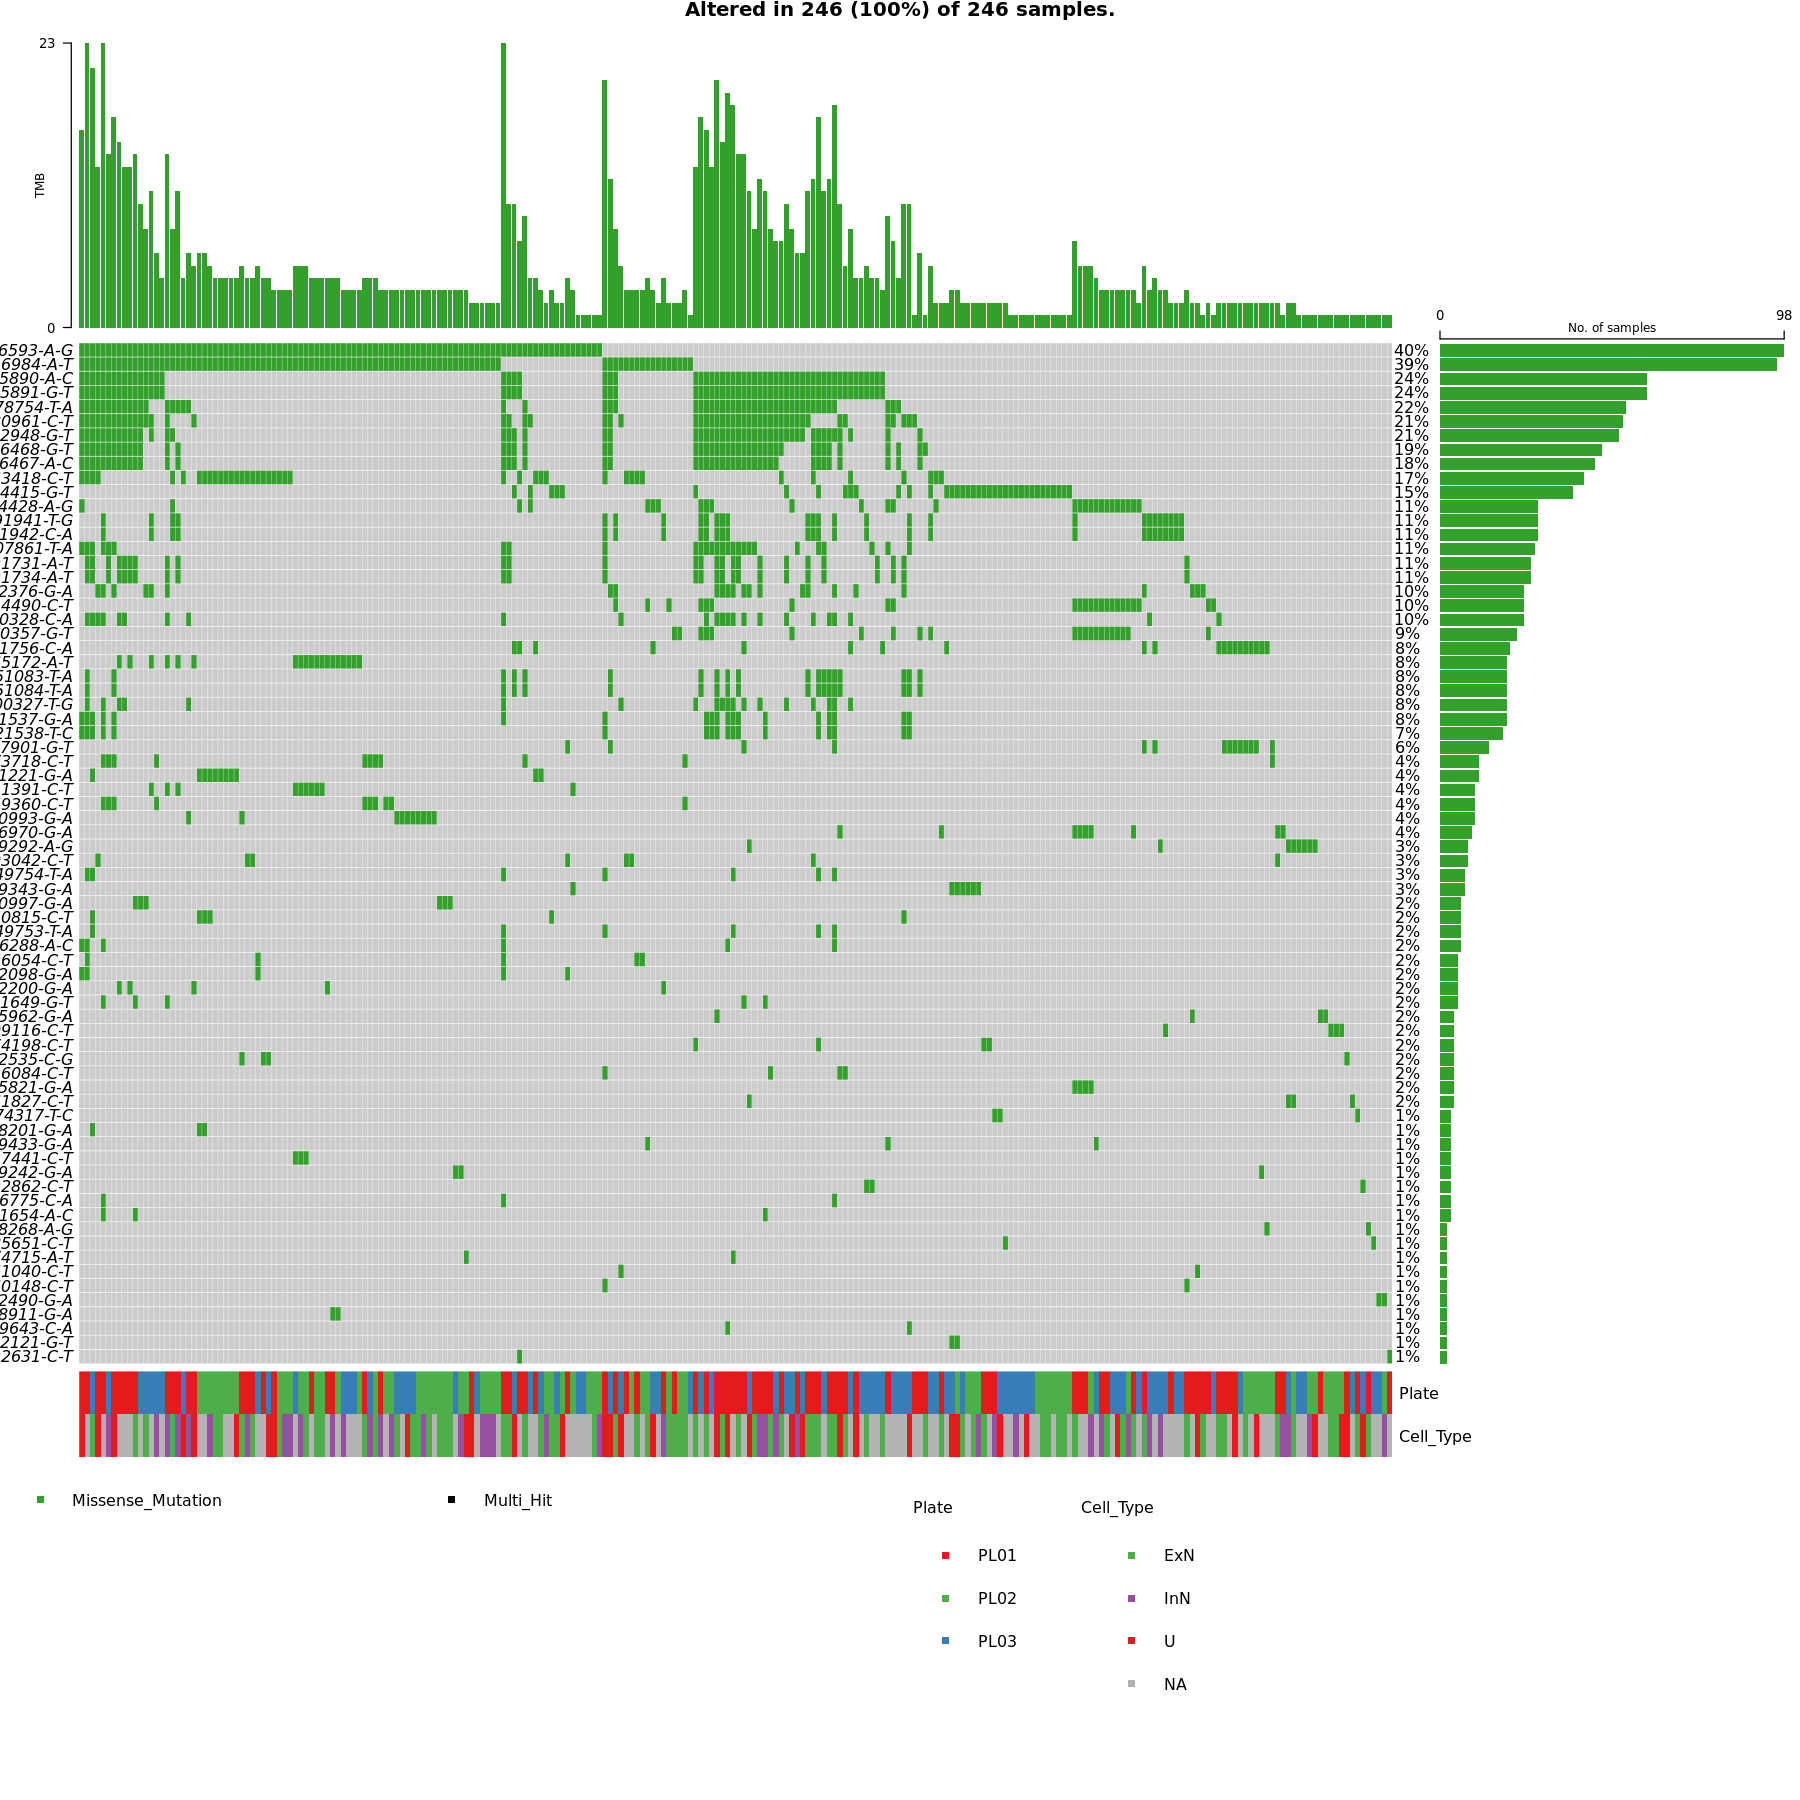

In [23]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)

In [536]:
pdf(file="7669_ResolveOME_oncoplot.pdf",width=12,height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 100, draw_titv = TRUE)
dev.off()

Warning message in titv(maf = maf, useSyn = TRUE, plot = FALSE):
“Non standard Ti/Tv class: 2TRUE”


png 
  2

In [537]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [644]:
filtered <- subset(raw, BINARY %in% c(1) &Mosaic_shared_btw_WGS_Amp==1& Cell_Type %in% c("InN") & PLATE %in% c("PL01","PL02","PL03"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<5 & recurrency$Recurrency>0,]$variant)

In [645]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [646]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [647]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [648]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.064s elapsed (0.100s cpu) 


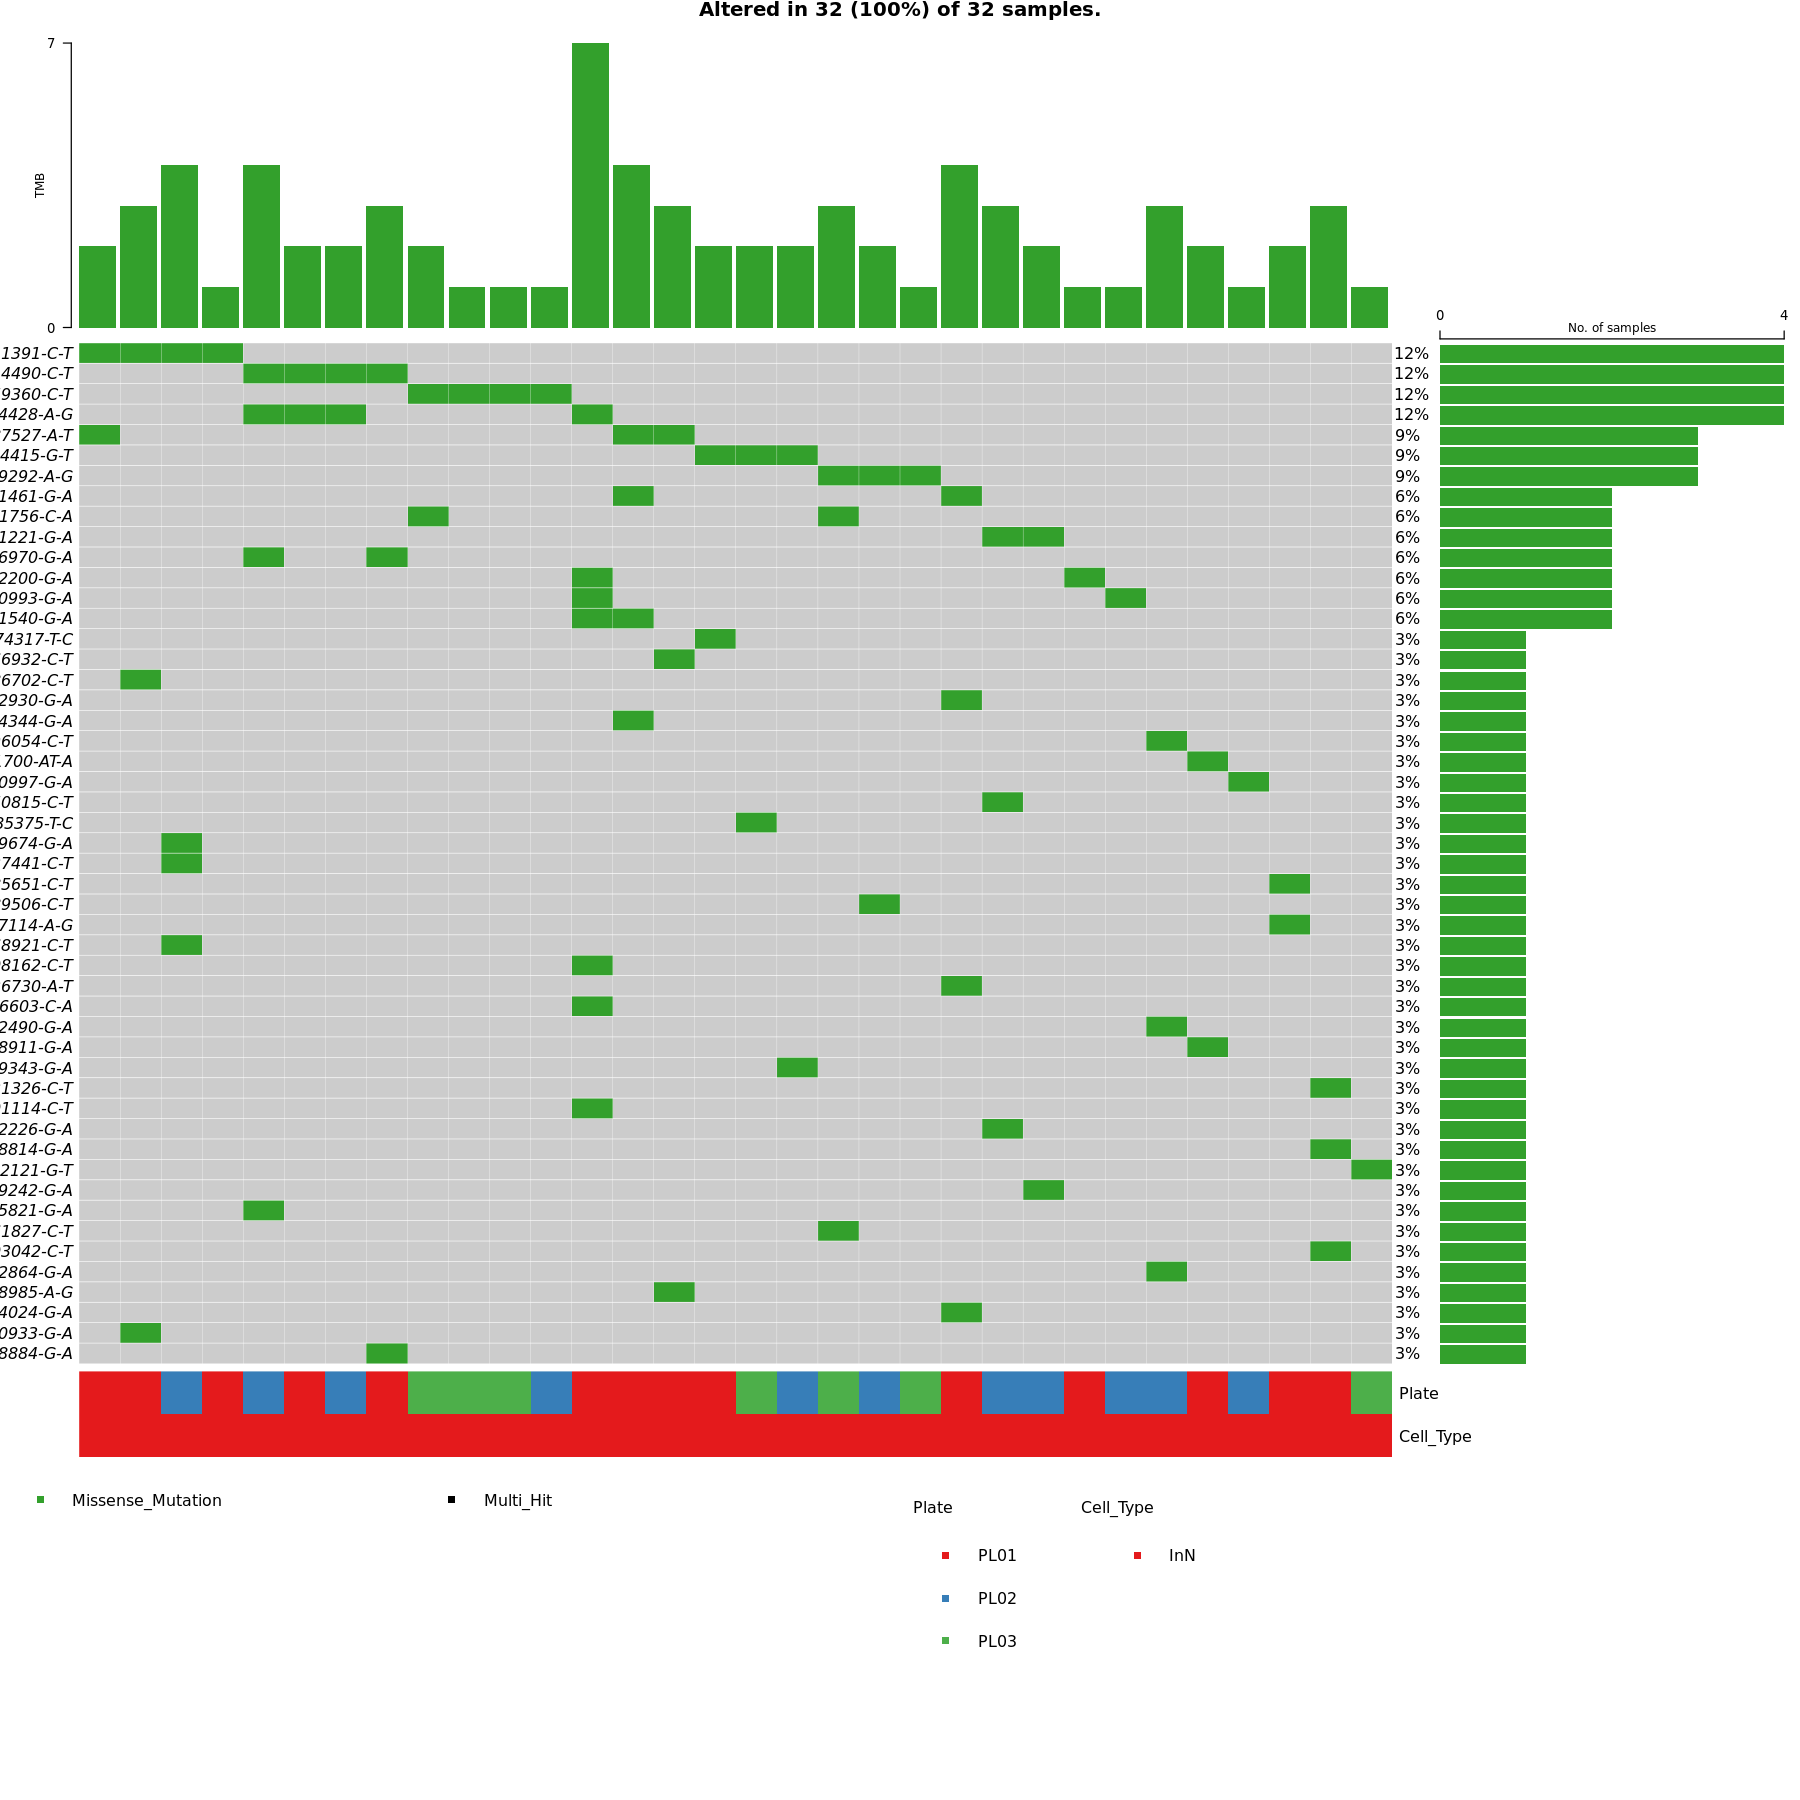

In [649]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)

In [544]:
pdf(file="7669_ResolveOME_oncoplot_InN.pdf",width=12,height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)
dev.off()

png 
  2

In [638]:
filtered <- subset(raw, Mosaic_shared_btw_WGS_Amp==1&  BINARY %in% c(1) & Cell_Type %in% c("ExN") & PLATE %in% c("PL01","PL02","PL03"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<5,]$variant)

In [639]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [640]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [641]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [642]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.075s elapsed (0.090s cpu) 


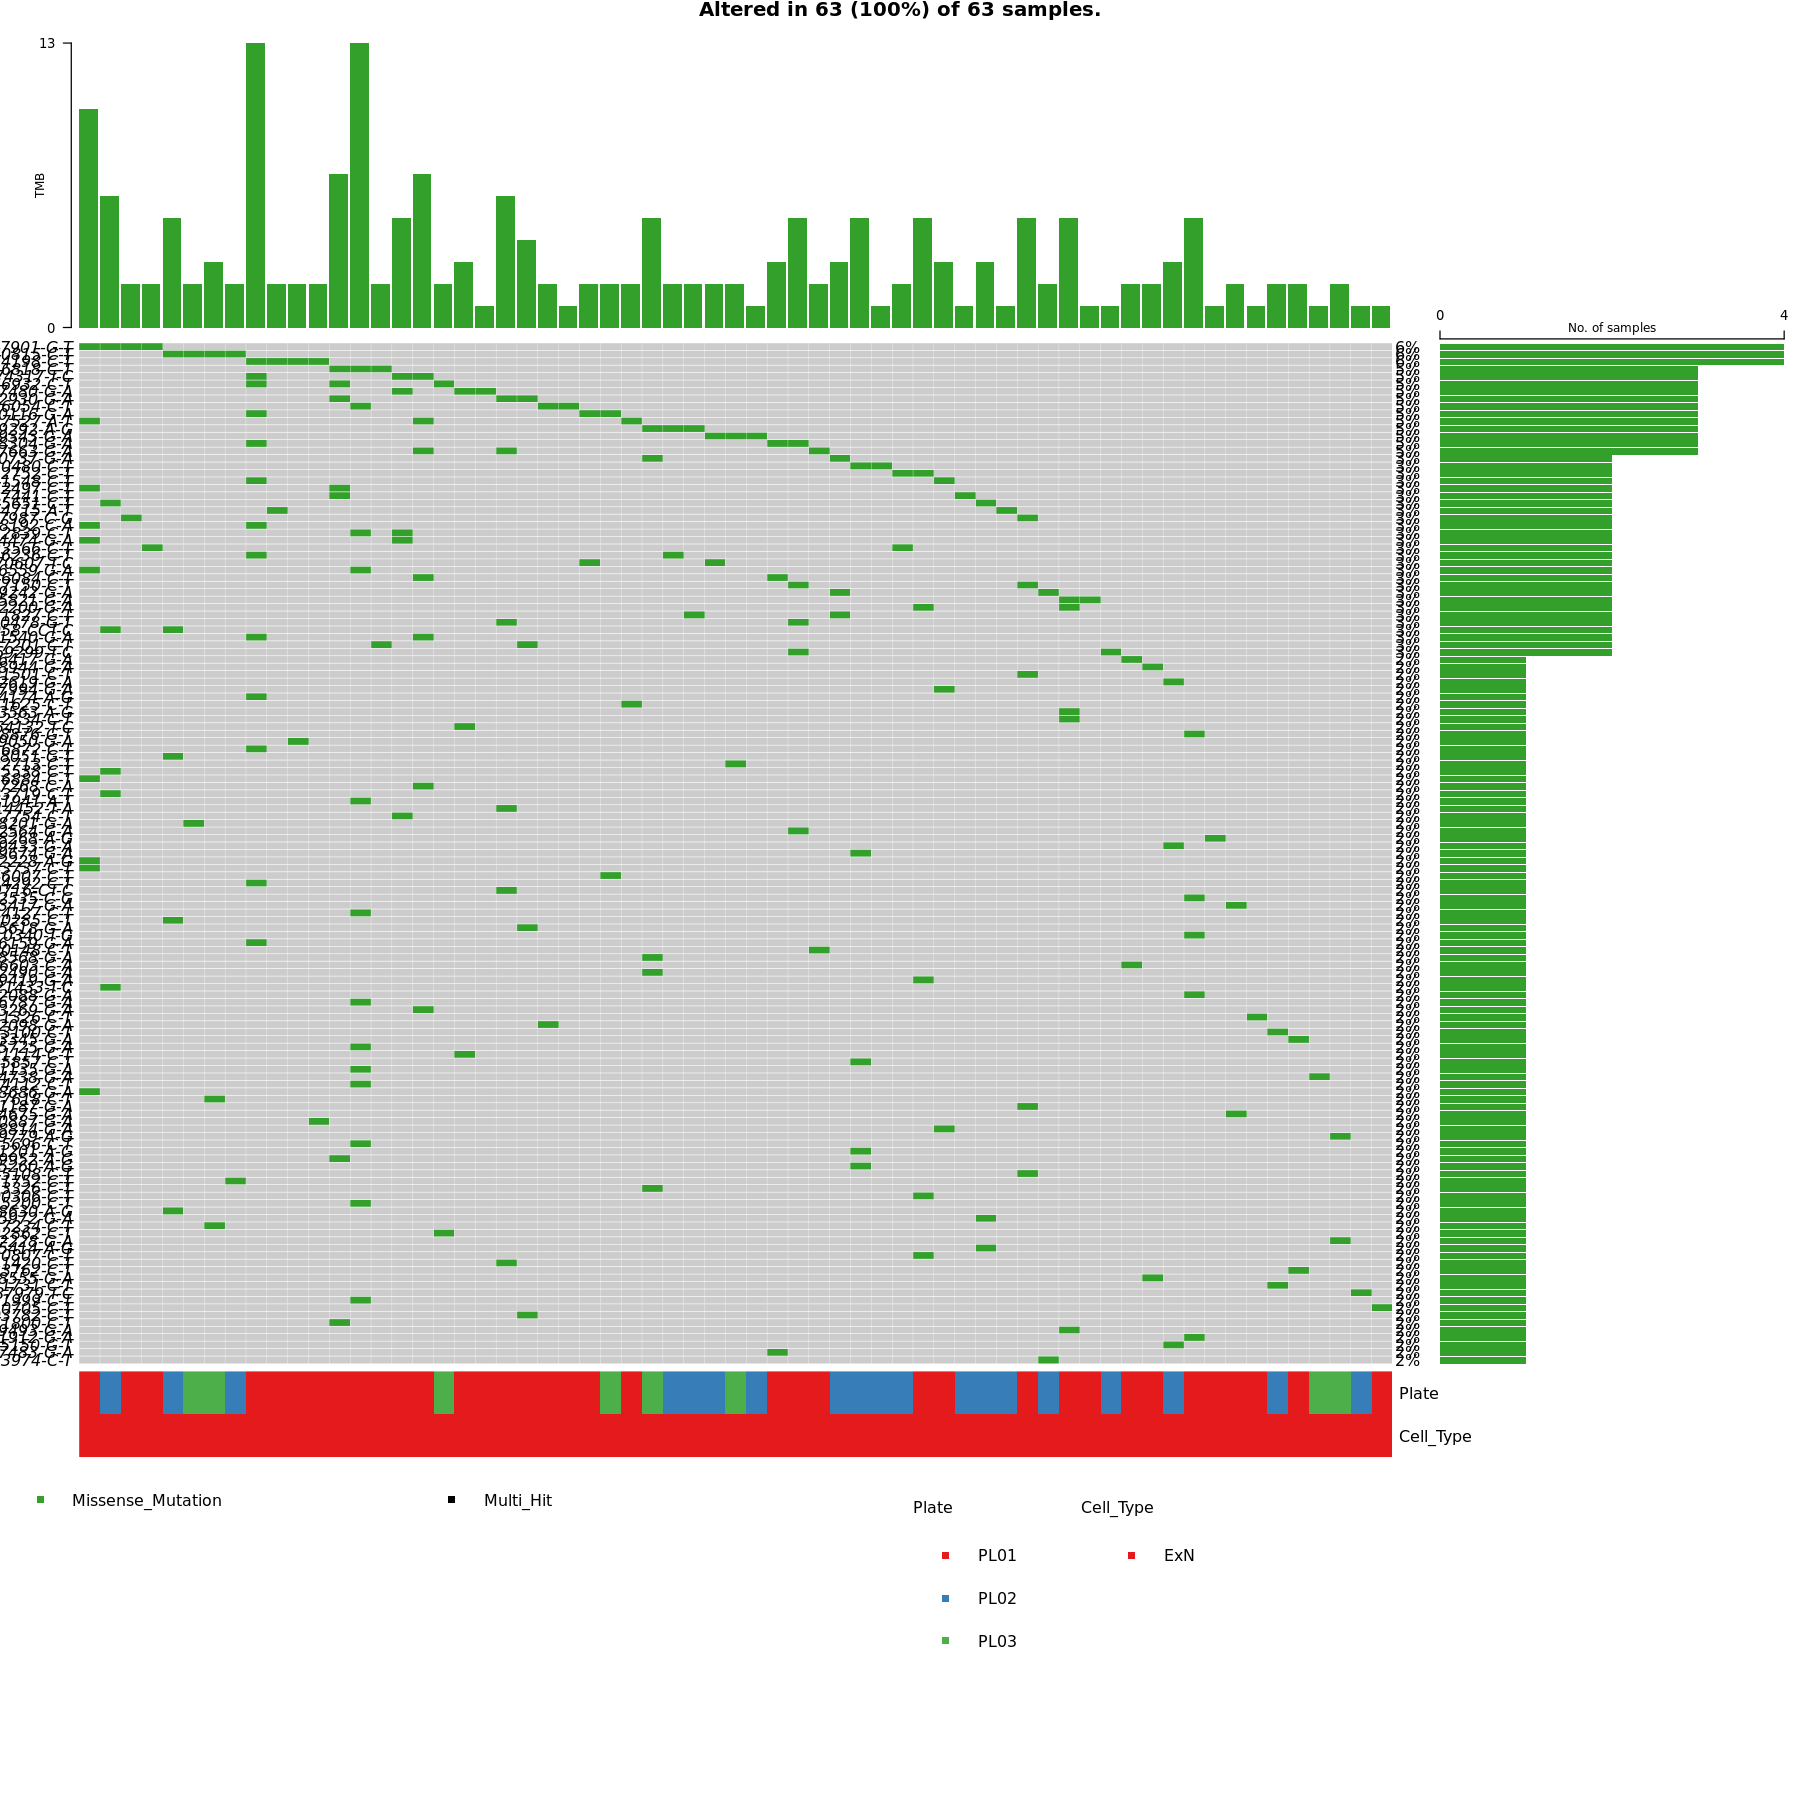

In [643]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)

In [551]:
pdf(file="7669_ResolveOME_oncoplot_ExN.pdf",width=12,height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)
dev.off()

png 
  2

In [537]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [53]:
filtered <- subset(raw, BINARY %in% c(1) &Mosaic_shared_btw_WGS_Amp==1& Cell_Type %in% c("InN","ExN") & PLATE %in% c("PL02"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
 filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<20 & recurrency$Recurrency>0,]$variant)

In [54]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [55]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [56]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [57]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.063s elapsed (0.082s cpu) 


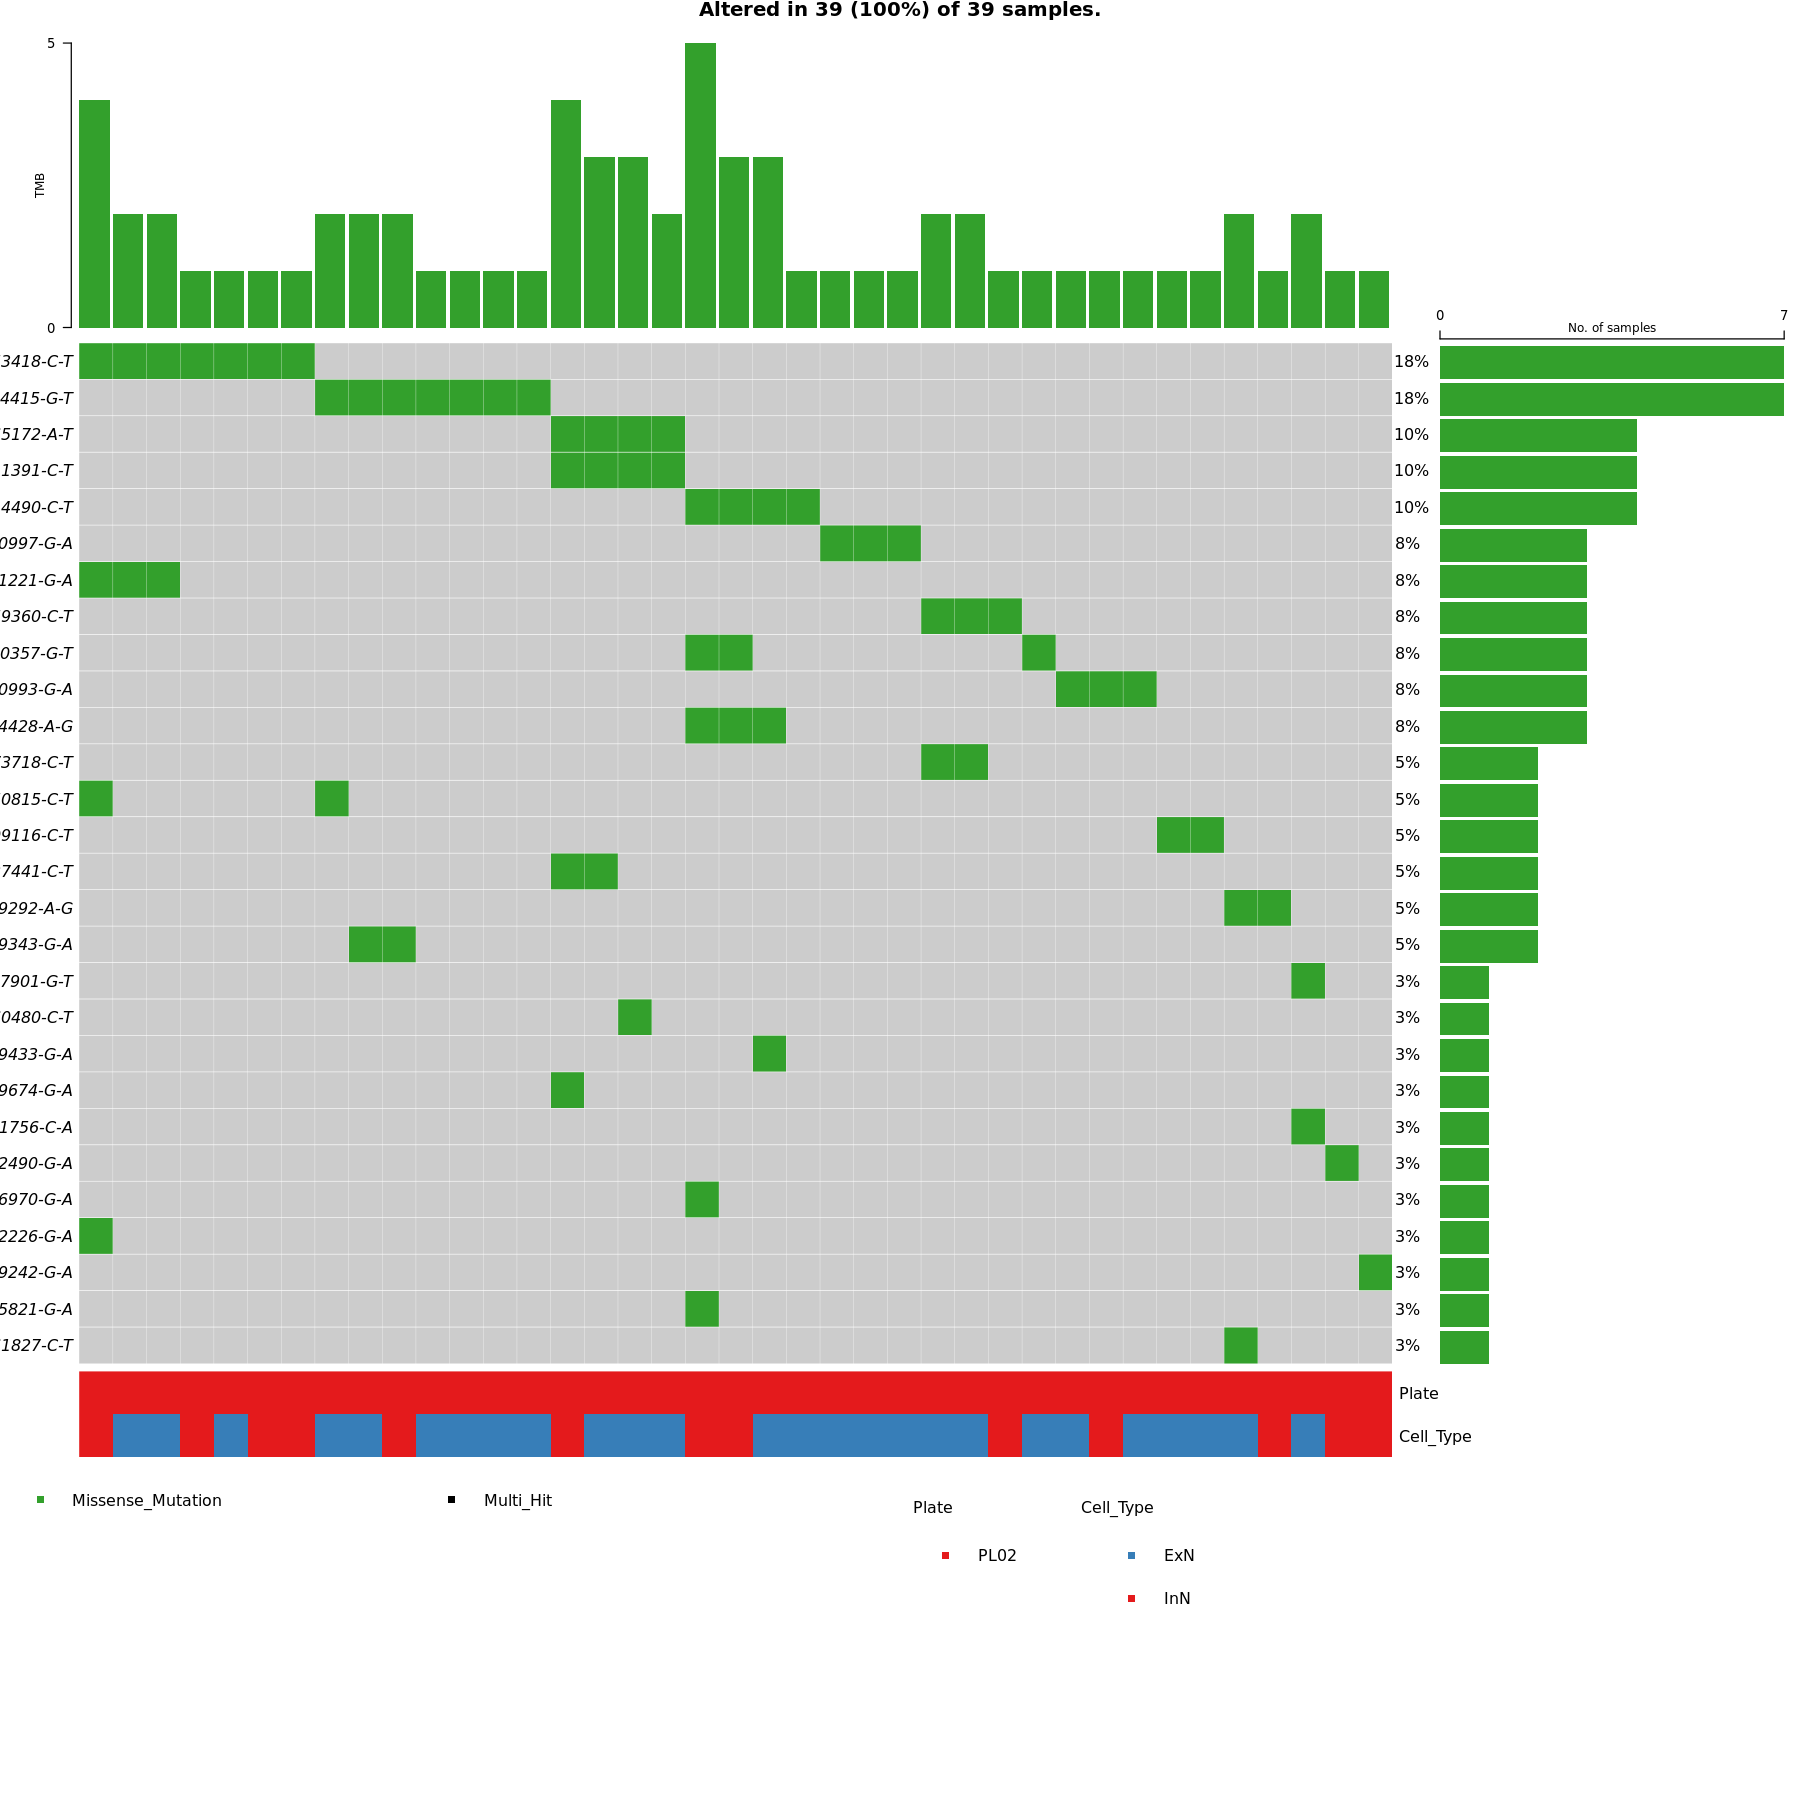

In [58]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)

In [27]:
pdf(file="7669_ResolveOME_oncoplot_PL01.pdf",width=12,height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)
dev.off()

png 
  2

In [537]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [690]:
filtered <- subset(raw, BINARY %in% c(1) &Mosaic_shared_btw_WGS_Amp==1& Cell_Type %in% c("InN","ExN") & PLATE %in% c("PL02"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<20 & recurrency$Recurrency>0,]$variant)

In [691]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [692]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [693]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [694]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.064s elapsed (0.091s cpu) 


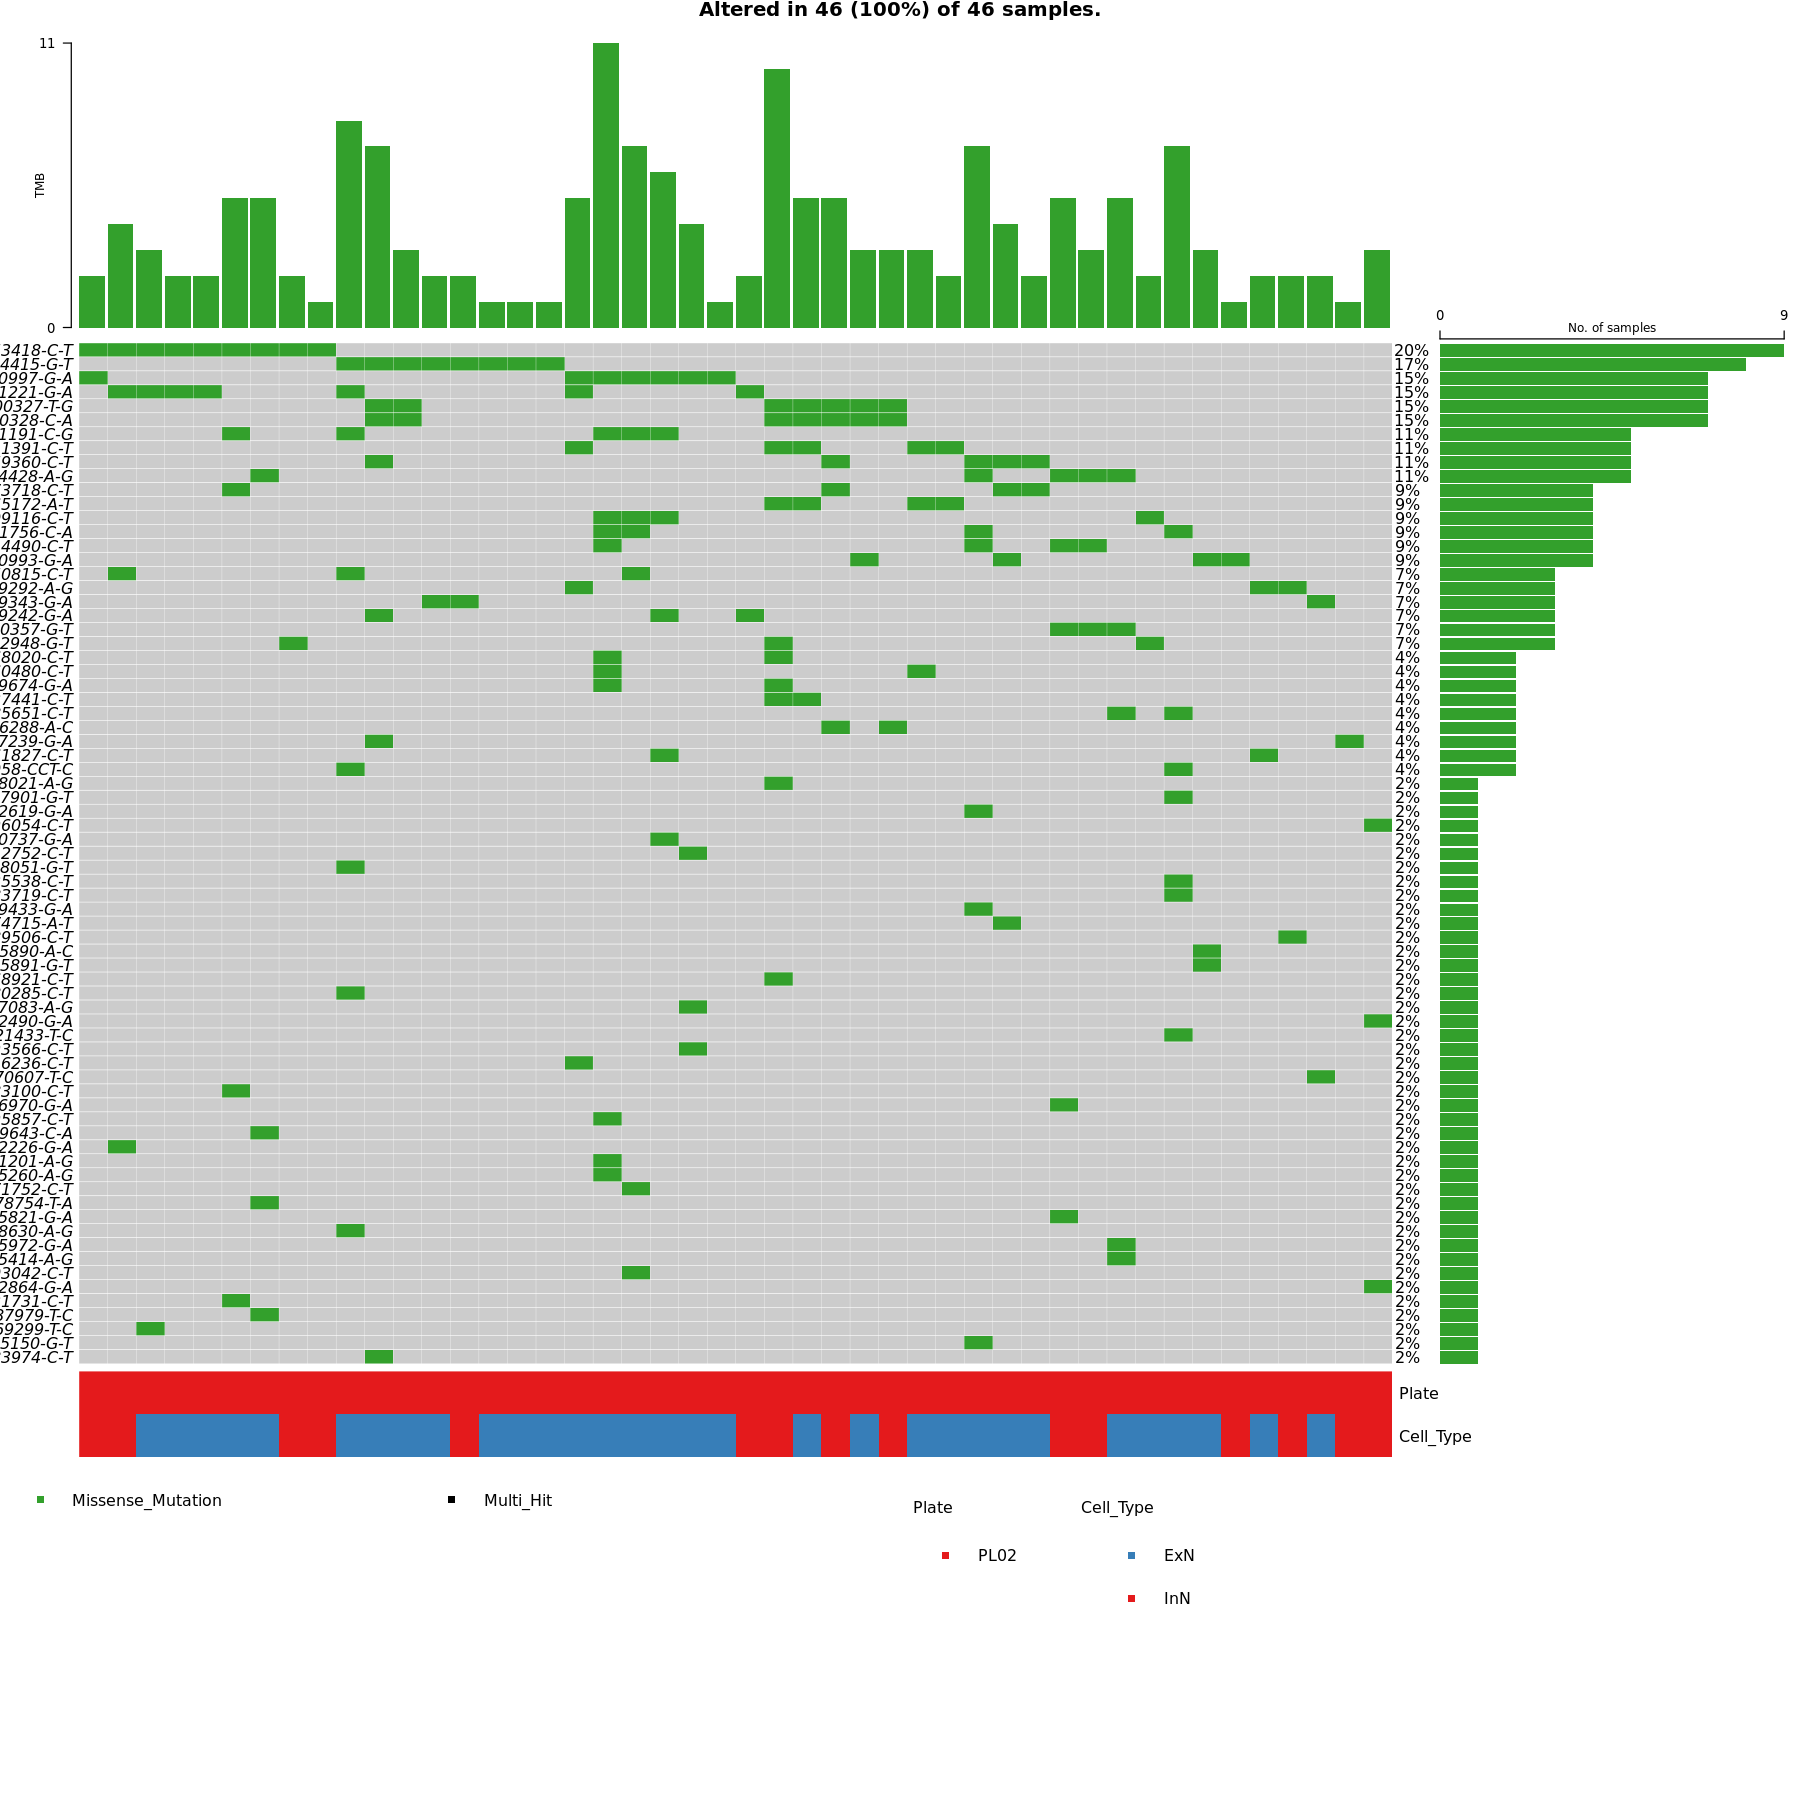

In [695]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)

In [537]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)

In [684]:
filtered <- subset(raw, BINARY %in% c(1) &Mosaic_shared_btw_WGS_Amp==1& Cell_Type %in% c("InN","ExN") & PLATE %in% c("PL03"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<5 & recurrency$Recurrency>0,]$variant)

In [685]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [686]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [687]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [688]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.064s elapsed (0.085s cpu) 


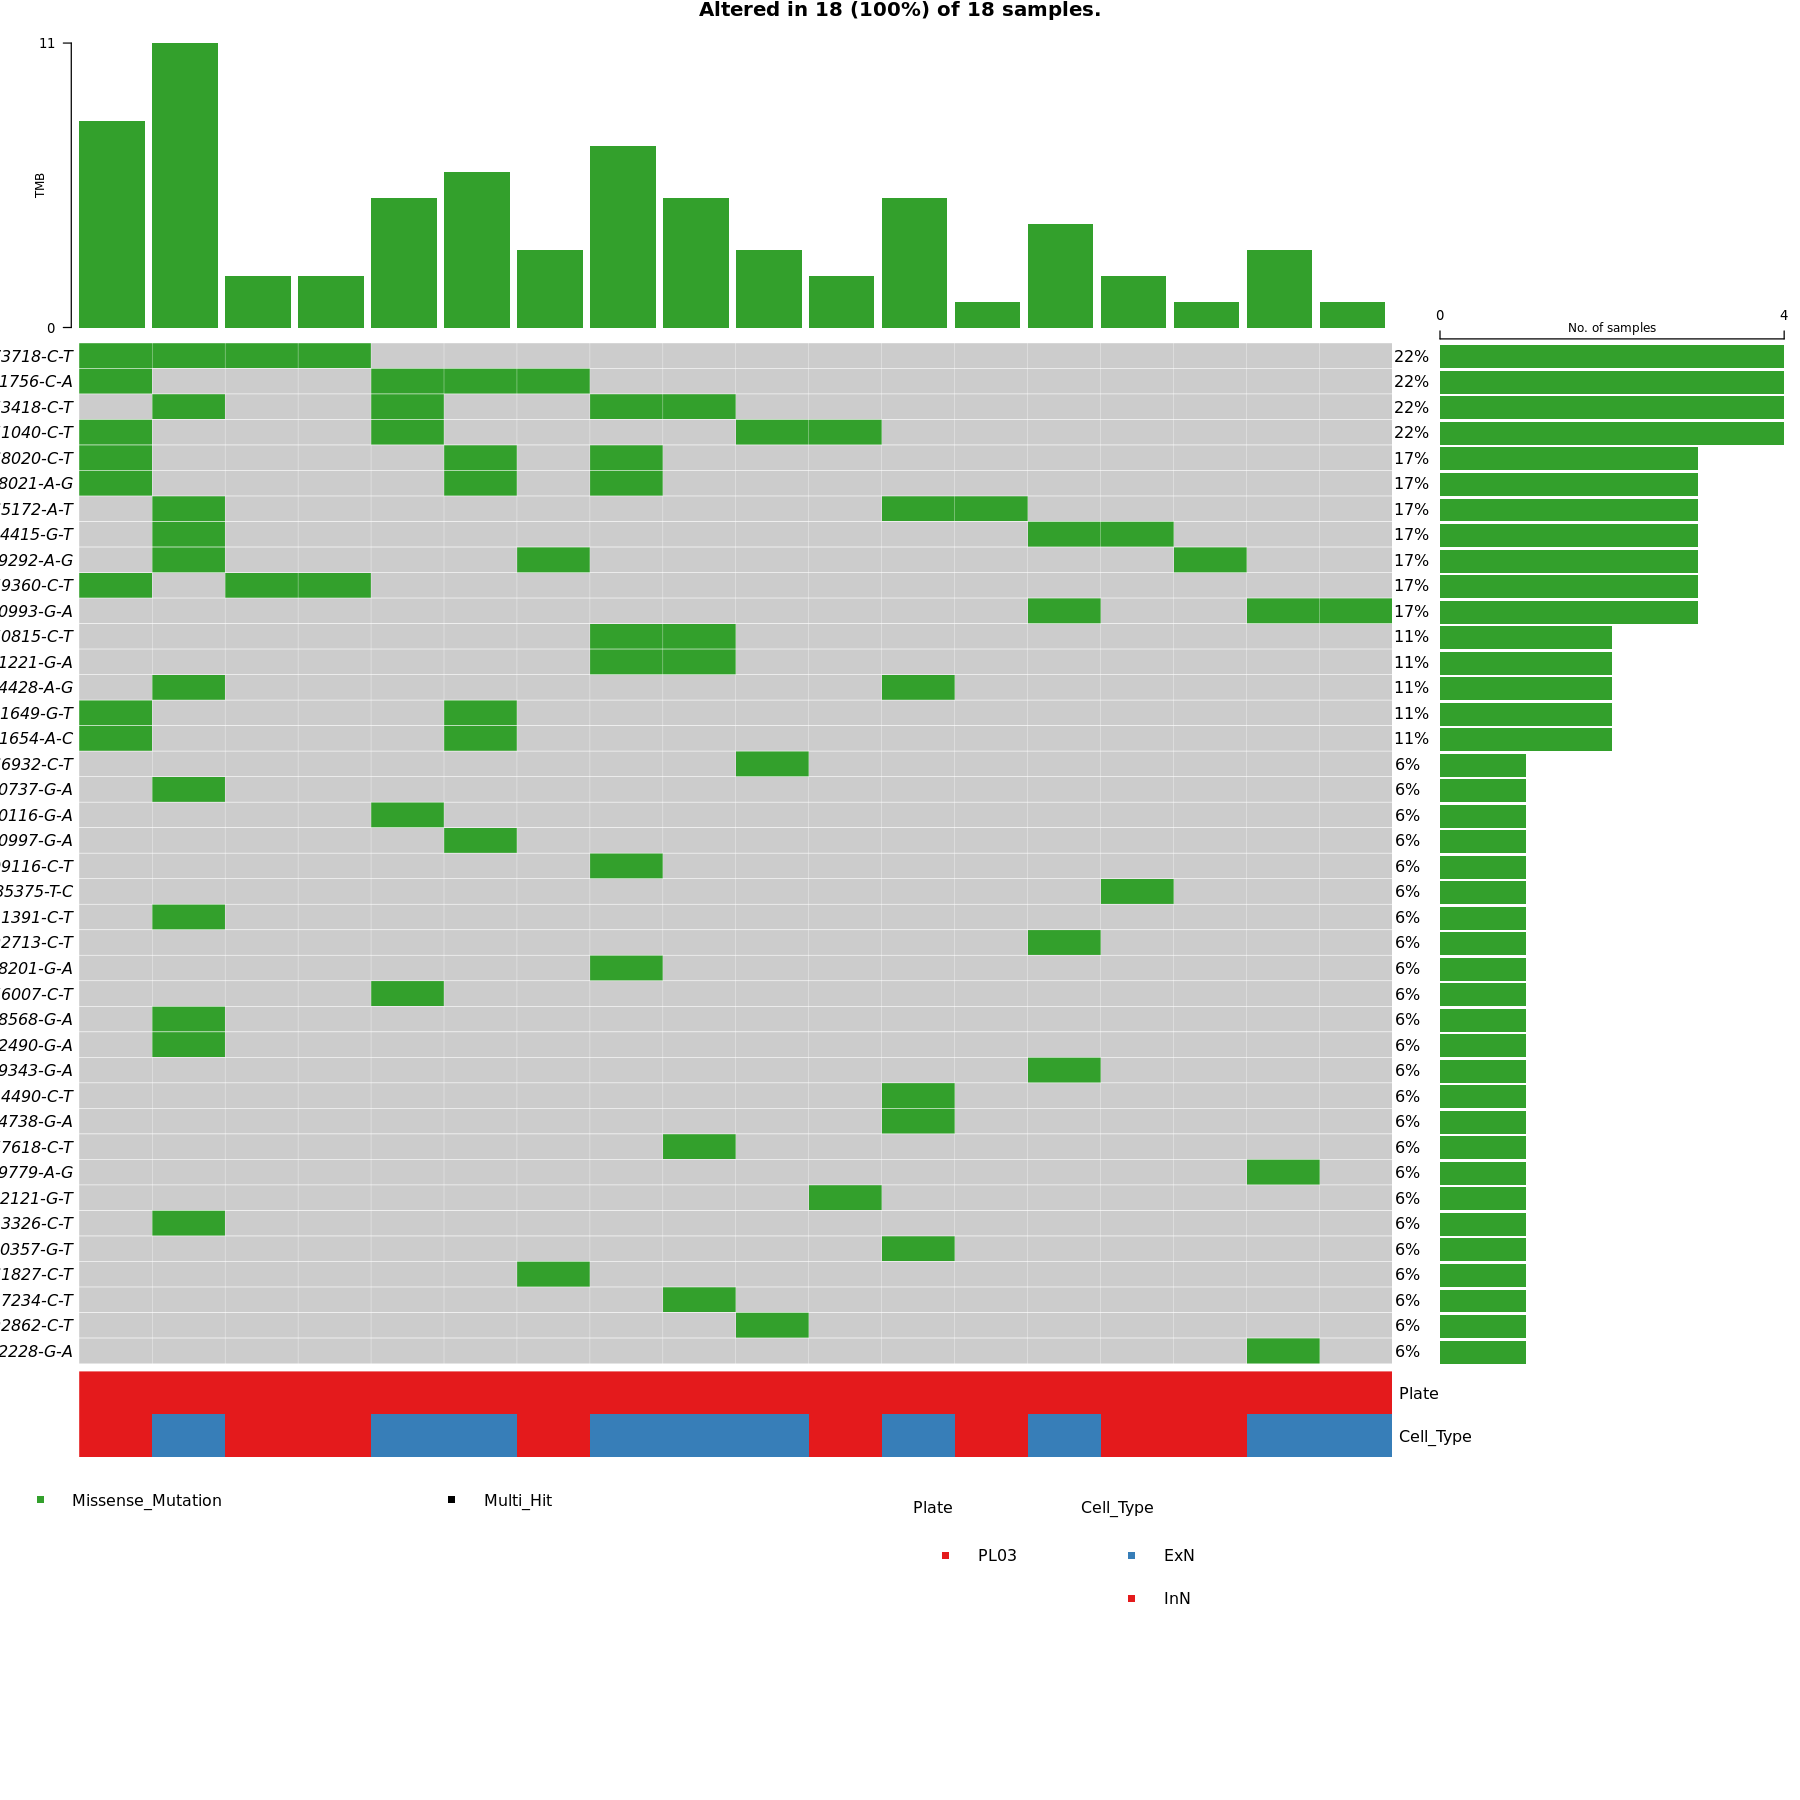

In [689]:
options(repr.plot.width=15, repr.plot.height=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = FALSE ,top = 1000, draw_titv = FALSE)